In [1]:
import numpy as np
import matplotlib.pyplot as plt
from metrics_amazon import precision_recall_curve

In [13]:
y_preds = np.load('work_dirs/exp04/preds.npy')[:, 0]
print(y_preds.shape)
y_trues = np.load('work_dirs/exp04/labels_patches.npy')[:, 0, :, 0]
print(y_trues.shape)

thresholds = np.arange(0, 1, 0.01)
# print(thresholds)
# print(thresholds.shape)
prec, recall, th = precision_recall_curve(thresholds, y_trues, y_preds)

(77712, 2, 64, 64)
(77712, 2, 64, 64)


PrecisionxRecall: 100%|██████████| 100/100 [10:58<00:00,  6.58s/it]


In [14]:
f1_scores = 2 * prec * recall / (prec + recall)

In [4]:
print(f1_scores.shape)

(100,)


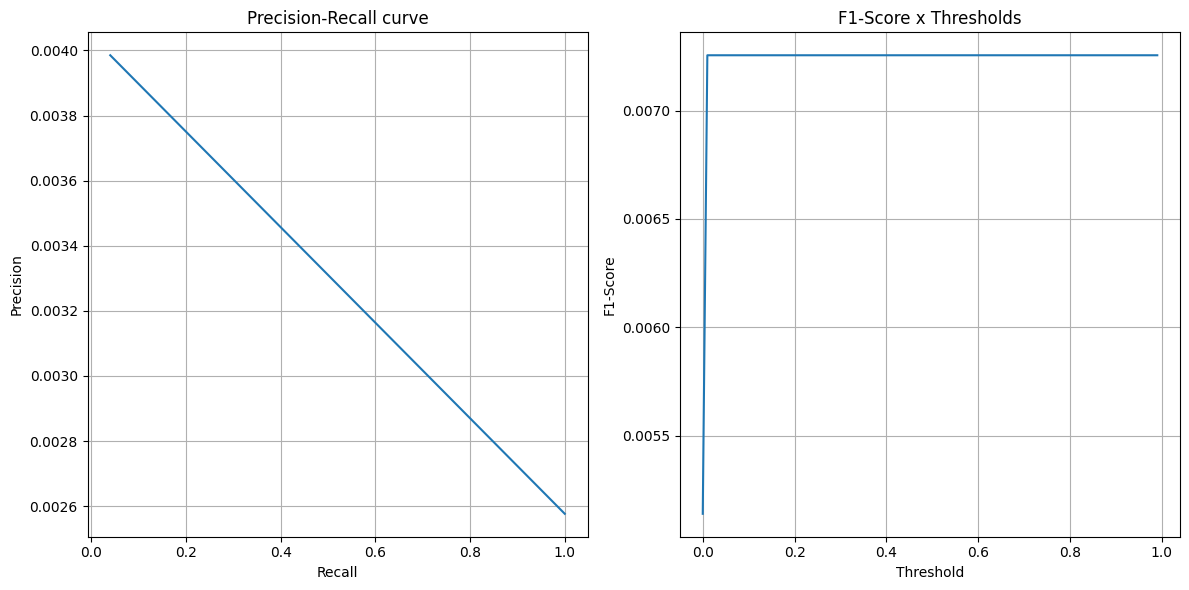

In [15]:
# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, prec, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid(True)

# Plot F1-Score x Thresholds
plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores, label='F1-Score for each threshold')  # Exclude the last value because it corresponds to recall = 0
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score x Thresholds')
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
y_trues2 = y_trues[y_trues == -1]
print(y_trues2.shape)

(635384048,)


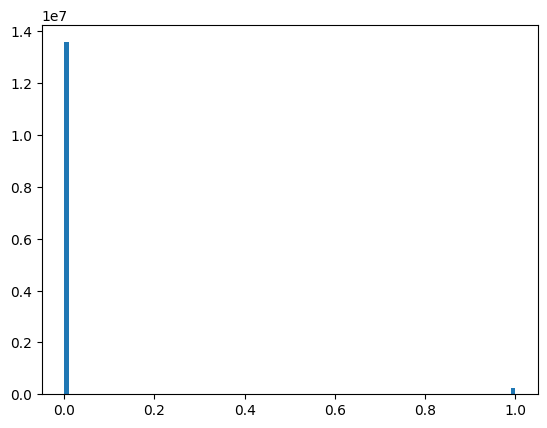

In [7]:
y_preds2 = y_preds[y_trues != -1]

# Plot histogram
plt.hist(y_preds2, bins=100)
plt.show()

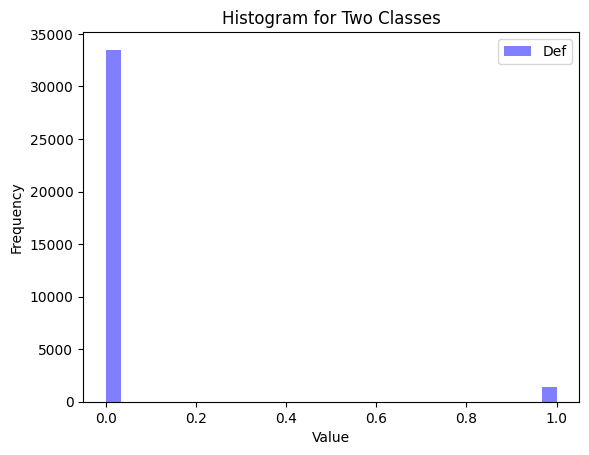

In [16]:
# Assuming class1_values and class2_values are the data for your two classes

def_preds = y_preds[(y_trues == 1) & (y_trues != -1)]
no_def_preds = y_preds[(y_trues == 0) & (y_trues != -1)]


plt.hist(def_preds, bins=30, alpha=0.5, label='Def', color='blue')
# plt.hist(no_def_preds, bins=30, alpha=0.5, label='No Def', color='red')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Two Classes')
plt.legend(loc='upper right')

plt.show()